# Convolutional Neural Networks with Pytorch
## By Allen Huang

### 1. Introduction of Convolutional Neural Networks

The convolutional neural network, often referred to as a convnet or cnn.

Convolutional neural networks got their start by working with imagery. The idea of doing image analysis is to recognize things like objects, such as humans, or cars.

In order to recognize a car or a human, it's fairly challenging to do so if you're thinking of things 1 pixel at a time. Instead, a convolutional neural network aims to use a sliding window (a kernel) that takes into account a group of pixels, to hopefully recognize small features like "edges" or "curves" and then another layer might take combinations of edges or curves to detect shapes like squares or circles, or other complex types of shapes...and so on.

- you do not need to flatten the image like fully connected layers. CCN accepts two-dimensional input, even 3D. 

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pythonprogramming.net/static/images/machine-learning/cat-example.png",width=400, height=400)

This is not just a image, it's pixels.

In [4]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/pixelated-image-example.png",width=400, height=400)

![jupyter](https://pythonprogramming.net/static/images/machine-learning/pixelated-image-example.png)

Two-dimensional array of pixels.

In [5]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/convolution-window.png",width=400, height=400)

We apply convolutions, which come over the image. The goal of convolutions is locate features. Here we use a 3 by 3 window(convolution kernal). It takes 3 by 3 pixels and look for feature. The first layer of CNN filters basically are these kernels tend to find things like edges or curves or corner. Then it pass through another layer which find more complex features that edges, curves or corners bulid, like circles, squares. 

In [6]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/convolution-stride.png",width=400, height=400)

It generate a scaler (some number), then perform another convolution.

In [7]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/convolution-new-featuremap.png",width=400, height=400)

Keep sliding that window over the entire image. In this picture, we got 4 features at the end.

In [9]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/pooling-window.png",width=400, height=400)

Finally, we got a new condensed version of our image, which means features for machine. Max pooling is takes the maximum value within the window. 

In [11]:
Image(url= "https://pythonprogramming.net/static/images/machine-learning/max-pooling-example.png",width=500, height=500)

Take all of these and we pull it. The first layer just find very basic features (combination of pixels). Then the next layer is going to make combination (features from the first layer). 

### 2. Preparing Data 

Dateset: https://www.microsoft.com/en-us/download/details.aspx?id=54765

for MAC: https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

This dataset consists of a bunch of images of cats and dogs. Different breeds, ages, sizes (both the animal and the image)..etc.

Once you have downloaded the dataset, you need to extract it. I would just extract it to the directory that you're working in.

In [2]:
import os
import cv2
import numpy as np
from tqdm import tqdm
# pip install opencv-python

In [4]:
REBUILD_DATA = True
# pre-processing dataset, you do not want to build data every single time you run your code. 

In [5]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "/Users/hkmac/Desktop/Carzy_Allen_Github/Data_and_Testfile/kagglecatsanddogs_3367a/PetImages/Cat" 
    DOGS = "/Users/hkmac/Desktop/Carzy_Allen_Github/Data_and_Testfile/kagglecatsanddogs_3367a/PetImages/Dog"
    TESTING = "/Users/hkmac/Desktop/Carzy_Allen_Github/Data_and_Testfile/kagglecatsanddogs_3367a/PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    # the keys are cats and dogs, which are the directory.
    training_data = []
    catcount = 0
    dogcount = 0  # in order to check about balance

    def make_training_data(self):
        # iterate over directorys (cats and dogs), this will only returns the keys. Which means is CATS and DOGS directory
        for label in self.LABELS:
            # iterate over the pictures, os.listdir(label) will show all of the filename under the certain path
            for f in tqdm(os.listdir(label)):
            # tqdm is a process bar
                if "jpg" in f:
                # f is a fileanme 
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        # convert the image to grayscale, color does not matter but add data that we do not need
                        # load the image
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        # resize the img, pass in the size we want (50,50)
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  
                        # do something like print(np.eye(2)[1]), just makes one_hot, here we are going to use one_hot vector format
                        # here we got values for key (label) and then use it as a index
                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                            
                    except Exception as e:
                        # some of these images are not good, so loading will get an error
                        pass
                        # print(label, f, str(e)
        # shuffle the data
        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

100%|██████████| 12501/12501 [00:23<00:00, 522.49it/s]


Cats: 12476
Dogs: 12470


The IMG_SIZE is whatever we want, but we have to pick something. The images in the training data are all varying sizes and shapes. We're going to normalize all of the images by reshaping them to all be the same size. I will go with 50x50.

Next are just some variables that hold where the directories with the data are. Once extracted, you wind up with 2 directories. One is Cat, the other is Dog and those contain a bunch of images.

We want to iterate through these two directories, grab the images, resize, scale, convert the class to number (cats = 0, dogs = 1), and add them to our training_data.

In [5]:
# convert scalar into one_hot vector
cat = 0
dog = 1
# what index is hot? 0, so it's a cat~
[1,0]
# the way to convert is np.eye()

[1, 0]

In [6]:
np.eye(2)[cat]

array([1., 0.])

In [7]:
np.eye(2)[dog]

array([0., 1.])

In [8]:
!pwd

/Users/hkmac/Desktop/Carzy_Allen_Github/Deep Learning/Build Neural Networks with Pytorch


In [6]:
print(DogsVSCats().training_data[:3])

[[array([[168, 201, 225, ..., 240, 223, 252],
       [220, 254, 224, ..., 199, 145, 255],
       [219, 177, 241, ..., 198, 251, 245],
       ...,
       [175, 176, 118, ..., 176, 117, 208],
       [183, 185, 195, ..., 140, 163,  76],
       [155,  68, 124, ..., 244,  83,  37]], dtype=uint8), array([0., 1.])], [array([[ 59,  98, 137, ...,  76,  73,  78],
       [ 56,  78, 168, ...,  70,  72,  77],
       [ 64,  76, 108, ...,  67,  69,  79],
       ...,
       [ 75,  86, 155, ..., 113, 110, 112],
       [ 79, 108, 198, ..., 108, 113, 120],
       [ 65, 132, 138, ..., 112, 114, 118]], dtype=uint8), array([0., 1.])], [array([[ 98,  78,  94, ...,  65,  58,  69],
       [ 99,  95,  98, ...,  54,  60,  77],
       [147,  98, 100, ...,  62,  78,  78],
       ...,
       [121, 126, 165, ..., 106, 120, 135],
       [165, 169, 147, ..., 143, 163, 153],
       [167, 173, 179, ..., 133, 162, 154]], dtype=uint8), array([1., 0.])]]


In [7]:
training_data = np.load("/Users/hkmac/Desktop/Carzy_Allen_Github/Data_and_Testfile/kagglecatsanddogs_3367a/training_data.npy", allow_pickle=True)
print(len(training_data))
# that's all of our samples

24946


In [8]:
print(training_data[1])
# it's a dog~
print(training_data[2])
# a cat!

[array([[ 59,  60,  62, ...,  91,  12,  31],
       [ 58,  62,  65, ...,  94,   6,  22],
       [ 65,  63,  66, ...,  92,   9,  26],
       ...,
       [ 54, 162,  88, ...,  92, 150, 152],
       [ 84,  87,  84, ...,  86, 146, 153],
       [ 88,  98,  98, ...,  93, 113, 146]], dtype=uint8)
 array([0., 1.])]
[array([[ 76,  31,  19, ..., 119, 116,  74],
       [ 73,  31,  21, ..., 122, 121,  86],
       [ 61,  32,  20, ..., 121, 120,  98],
       ...,
       [  8,   6,  12, ..., 112, 108, 106],
       [  6,   6,  12, ..., 107, 106, 105],
       [  6,   5,   7, ..., 106, 104, 102]], dtype=uint8)
 array([1., 0.])]


In [14]:
training_data[2723][1]

array([0., 1.])

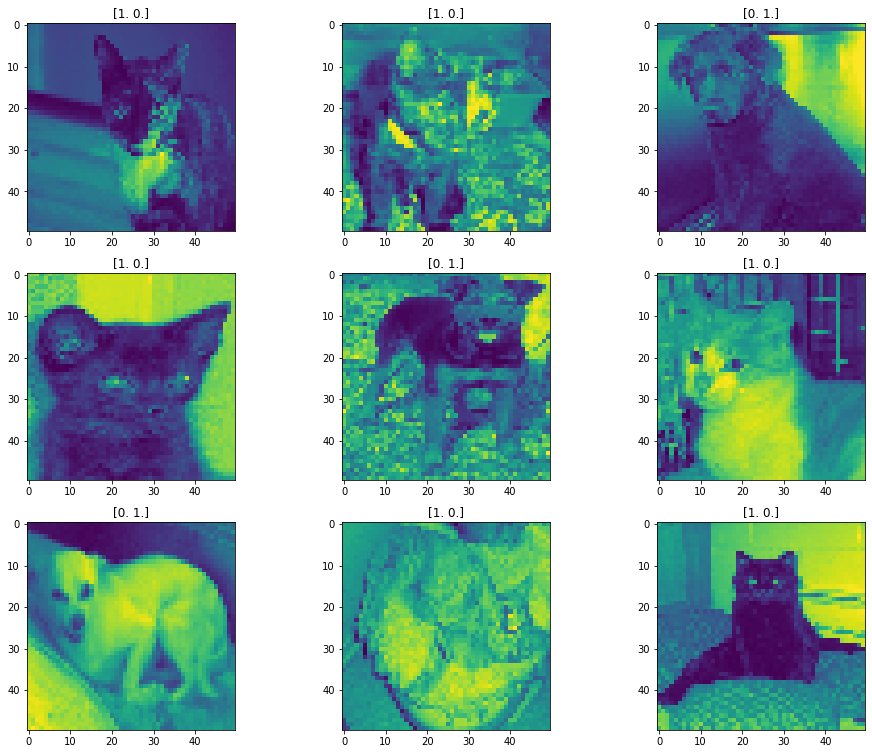

In [66]:
    plt.rcParams['figure.figsize'] = [16, 13]
    plt.figure(33)
    for i in range(331,340,1):
        plt.subplot(i)
        plt.imshow(training_data[i][0])
        plt.title(training_data[i][1])

In [68]:
# Now we can split our training data into X and y, as well as convert it to a tensor
# We also need to shape this data (view it, according to Pytorch) in the way Pytorch expects us (-1, IMG_SIZE, IMG_SIZE)
import torch
X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

### 辅助理解

In [122]:
# 了解我们的数据，y实际上就是一个列表，而每一个元素是表示猫或者狗的列表 (one hot vector)
print(y)
print(y[0])
print(y[3])

tensor([[0., 1.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]])
tensor([0., 1.])
tensor([1., 0.])


In [125]:
# 对于我们的training data，是一个包含全部X和y的列表，每一个元素包含X(image) 和y (one hot vector)
training_data[1][1]

array([0., 1.])

In [137]:
# 对于X，也就是包含全部猫和狗image的列表，三个维度，一共24946个image，而每一个image都是50*50的
print(X.shape)
print(X[0].shape)
print(X[0][0])
# 我们可以发现，X[0]是一个50*50的array, X[0][0]就是其第0行的50个数

torch.Size([24946, 50, 50])
torch.Size([50, 50])
tensor([0.5765, 0.6784, 0.5294, 0.5804, 0.4588, 0.3765, 0.5059, 0.4353, 0.4980,
        0.5255, 0.4471, 0.7020, 0.5294, 0.6392, 0.6941, 0.7373, 0.6784, 0.6588,
        0.6824, 0.6549, 0.7059, 0.7137, 0.6863, 0.6902, 0.6902, 0.6078, 0.6431,
        0.5843, 0.3451, 0.1608, 0.1333, 0.0941, 0.1059, 0.1333, 0.2745, 0.6510,
        0.6588, 0.6275, 0.1098, 0.1216, 0.1373, 0.2275, 0.1373, 0.2745, 0.1176,
        0.2118, 0.1294, 0.1059, 0.0784, 0.1412])
tensor([[0.5765, 0.6784, 0.5294,  ..., 0.1059, 0.0784, 0.1412],
        [0.5569, 0.6510, 0.6314,  ..., 0.2039, 0.2000, 0.1098],
        [0.6000, 0.5569, 0.7255,  ..., 0.1804, 0.2588, 0.0980],
        ...,
        [0.9333, 0.9529, 0.9765,  ..., 0.7765, 0.7137, 0.7725],
        [0.8745, 0.9725, 0.9490,  ..., 0.6431, 0.6627, 0.5451],
        [0.8784, 0.9725, 0.9137,  ..., 0.4392, 0.3059, 0.5059]])


### 3. Training Model 

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [70]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() 
        # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) 
        # input is 1 image, 32 output channels (features), 5x5 kernel size / window
        self.conv2 = nn.Conv2d(32, 64, 5) 
        # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 conv
        self.conv3 = nn.Conv2d(64, 128, 5)
        # that's our 3 2-d convolutional layers

        x = torch.randn(50,50).view(-1,1,50,50)
        # -1 means could be any size of data
        # 这里我们假设了一个x，这个x一个image, 50*50. view是为了让它符合我们实际X的格式
        self._to_linear = None
        self.convs(x)
        # part of our forward method，将x pass in convs function
        
        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).
        
    def convs(self, x):
        # it's just like our forward method, but we just run it through 3 conv layer.
        # max pooling over 2x2. The shape of pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
            # For example, if the shape of the tensor is (2,5,3), you just need to do 2x5x3 (30). 
            # here we got 128*2*2
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)
        # activation function
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


__convolutional layer__

The layers have 1 more parameter after the input and output size, which is the kernel window size. This is the size of the "window" that you take of pixels. A 5 means we're doing a sliding 5x5 window for colvolutions.

The same rules apply, where you see the first layer takes in 1 image, outputs 32 convolutions, then the next is going to take in 32 convolutions/features, and output 64 more...and so on.

Now comes a new concept. Convolutional features are just that, they're convolutions, maybe max-pooled convolutions, but they aren't flat. We need to flatten them, like we need to flatten an image before passing it through a regular layer.

__linear layer__

You need to flatten the output from the last convolutional layer before you can pass it through a regular "dense" layer (or what pytorch calls a linear layer. The way to solve this is to simply *determine the actual shape of the flattened output after the first convolutional layers*. How? Well, we can...just simply pass some fake data initially to just get the shape. I can then just use a flag basically to determine whether or not to do this partial pass of data to grab the value. We could keep the code itself cleaner by grabbing that value every time as well, but I'd rather have faster speeds and just do the calc one time.

Whenever we initialize, we will create some random data, we'll just set self.__to_linear to none, then pass this random x data through self.convs, which doesn't yet exist.

What we're going to do is have self.convs be a part of our forward method. Separating it out just means we can call just this part as needed, without needing to do a full call.

In [72]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

Next, we're ready to actually train the model, so we need to make a training loop. For this, we need a loss metric and optimizer. Again, we'll use the Adam optimizer. This time, since we have one_hot vectors, we're going to use mse as our loss metric. MSE stands for mean squared error.

In [73]:
# We also want to separate out our data into training and testing groups
VAL_PCT = 0.1  # lets reserve 10% of our data for validation
val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [74]:
# 第val_size个image包含在test中
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

In [23]:
print(len(train_X), len(test_X))

22452 2494


Finally, we want to actually iterate over this data to fit and test. We need to decide on a batch size. If you get any memory errors, go ahead and lower the batch size. I am going to go with 100 for now:

In [75]:
# the very first thing you need to modify is batch size
BATCH_SIZE = 100
EPOCHS = 1 # we are run on CPU

for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        print(f"{i}:{i+BATCH_SIZE}")
# the first batch will the 0th to 100th

100%|██████████| 225/225 [00:00<00:00, 8617.41it/s]

0:100
100:200
200:300
300:400
400:500
500:600
600:700
700:800
800:900
900:1000
1000:1100
1100:1200
1200:1300
1300:1400
1400:1500
1500:1600
1600:1700
1700:1800
1800:1900
1900:2000
2000:2100
2100:2200
2200:2300
2300:2400
2400:2500
2500:2600
2600:2700
2700:2800
2800:2900
2900:3000
3000:3100
3100:3200
3200:3300
3300:3400
3400:3500
3500:3600
3600:3700
3700:3800
3800:3900
3900:4000
4000:4100
4100:4200
4200:4300
4300:4400
4400:4500
4500:4600
4600:4700
4700:4800
4800:4900
4900:5000
5000:5100
5100:5200
5200:5300
5300:5400
5400:5500
5500:5600
5600:5700
5700:5800
5800:5900
5900:6000
6000:6100
6100:6200
6200:6300
6300:6400
6400:6500
6500:6600
6600:6700
6700:6800
6800:6900
6900:7000
7000:7100
7100:7200
7200:7300
7300:7400
7400:7500
7500:7600
7600:7700
7700:7800
7800:7900
7900:8000
8000:8100
8100:8200
8200:8300
8300:8400
8400:8500
8500:8600
8600:8700
8700:8800
8800:8900
8900:9000
9000:9100
9100:9200
9200:9300
9300:9400
9400:9500
9500:9600
9600:9700
9700:9800
9800:9900
9900:10000
10000:10100
10100:10

In [76]:
for epoch in range(EPOCHS):
    for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
        batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
        batch_y = train_y[i:i+BATCH_SIZE]

        net.zero_grad()

        outputs = net(batch_X)
        loss = loss_function(outputs, batch_y)
        
        matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, batch_y)]
        in_sample_acc = matches.count(True)/len(matches)

        loss.backward()  # apply that and backward
        optimizer.step()    # Does the update
        

    print(f"Epoch: {epoch}. Loss: {loss}")
    print("In-sample acc:",round(in_sample_acc, 4))

100%|██████████| 225/225 [01:23<00:00,  3.01it/s]

Epoch: 0. Loss: 0.24111920595169067
In-sample acc: 0.5962


In [77]:
correct = 0
total = 0
with torch.no_grad():
    for i in tqdm(range(len(test_X))):
        real_class = torch.argmax(test_y[i])
        net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list
        predicted_class = torch.argmax(net_out)

        if predicted_class == real_class:
            correct += 1
        total += 1
print("Accuracy: ", round(correct/total, 3))

100%|██████████| 2494/2494 [00:04<00:00, 525.46it/s]

Accuracy:  0.61


### 4. Analysis of model

One of the main questions that we have at the moment is: How many epochs should we do? When will we know when to stop training?

We've determined that this model does learn, but also, how might we determine if some other model that we think of is better or worse?

With larger datasets and models that can take days/weeks/months to train, we want to know how to evaluate them in shorter periods of time to determine if we should keep training.

- in sample accuracy/loss
- out of sample accuracy/loss

In sample accuracy is the accuracy on the data we're actually feeding through the model for training. This is the data that we're "fitting" against.

Out-of-sample accuracy is the accuracy on data that we've set aside that the model will never see/fit against.

In general, we expect __*in-sample accuracy to be higher than out-of-sample accuracy*__. You may also hear "out of sample" accuracy referred to as "validation accuracy." While we expect validation/out-of-sample accuracy to be a bit worse than the in-sample accuracy, we want to track that delta. Something like 5-10% accuracy difference is pretty common, but as this delta grows, it usually signals to us that our model is beginning to "overfit" (the neural network is just memorizing the data and changing weights to work only for the training data, rather than generally understanding the data).

You can also track in and out of sample loss. You will often be able to spot both losses decline to a point, and then out of sample loss begins to arc and curve back upwards. This is usually a sign that you've gotten the most out of your model's training.

In [78]:
def fwd_pass(X, y, train=False):
    # the train flag is default to false, when we pass data, the weight will not be update 

    if train:
        net.zero_grad()
    outputs = net(X)
    matches  = [torch.argmax(i)==torch.argmax(j) for i, j in zip(outputs, y)]
    # how many argmax are identical to each other, means how many match success
    # calculate the accuracy
    acc = matches.count(True)/len(matches)
    # loss_function = nn.MSELoss() 是之前定义的
    loss = loss_function(outputs, y)

    if train:
        # do our back propagation and then optimize
        loss.backward()
        optimizer.step()

    return acc, loss

Either way, we want to still calc gradients, so that we can still compute the loss. Later, we can have a function that purely predicts, and that will do the whole with torch.no_grad thing. The only thing we want to check for is to see if this is meant to be training the model or not. We definitely do not want to modify weights when we do our validation data, for example. For this reason, I am going to default this to be False. I'd rather forget and not train the model at all (which will become quite obvious to us fairly fast) than to forget this flag and have our validation data secretly training the model, which would be much harder to notice.

In [28]:
# What is zip()?
i = [1,2,3,4,5]
j = [1,3,4,5,2]
for i in zip(i,j):
    print(i)

(1, 1)
(2, 3)
(3, 4)
(4, 5)
(5, 2)


In [79]:
import random
def test(size = 200):
    random_start = random.randint(0,len(test_X - size))
    X, y = test_X[random_start:random_start + size], test_y[random_start:random_start + size]
    with torch.no_grad():
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50),y)
    return val_acc, val_loss
val_acc, val_loss = test(size = 100)
print(val_acc, val_loss)

0.54 tensor(0.2553)


In [82]:
# to have a log file
# save the model name to the log file
import time

MODEL_NAME = f"model-{int(time.time())}"  
# gives a dynamic model name, to just help with things getting messy over time. 
# every time you run a model, it's gonna have a new time

net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()
print(MODEL_NAME)

model-1573622911


Now, we are going to loop through our model and call test() frequently, we want to train the model and track the in-sample acc and loss compare to out of sample acc and loss.

In [83]:
def train(net):
    BATCH_SIZE = 100
    EPOCHS = 0
    # create a sample log file 
    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            # iterate over our batches 
            for i in tqdm(range(0, len(train_X), BATCH_SIZE)):
                # slice our data into batches
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y = train_y[i:i+BATCH_SIZE]
                # do a forward pass, set your train flag
                acc, loss = fwd_pass(batch_X, batch_y, train=True)
                # calculate in sample acc and loss, each 50 steps
                if i%50 == 0:
                    val_acc, val_loss = test(size = 100)
                    f.write(f"{MODEL_NAME},{int(time.time())},in_sample,{round(float(acc),2)},{round(float(loss),4)}, out_of_sample,{round(float(val_acc),2)},{round(float(val_loss),4)}\n")

In [84]:
train(net)

 16%|█▋        | 37/225 [00:17<01:30,  2.07it/s]

KeyboardInterrupt: 

<Figure size 3000x2400 with 0 Axes>

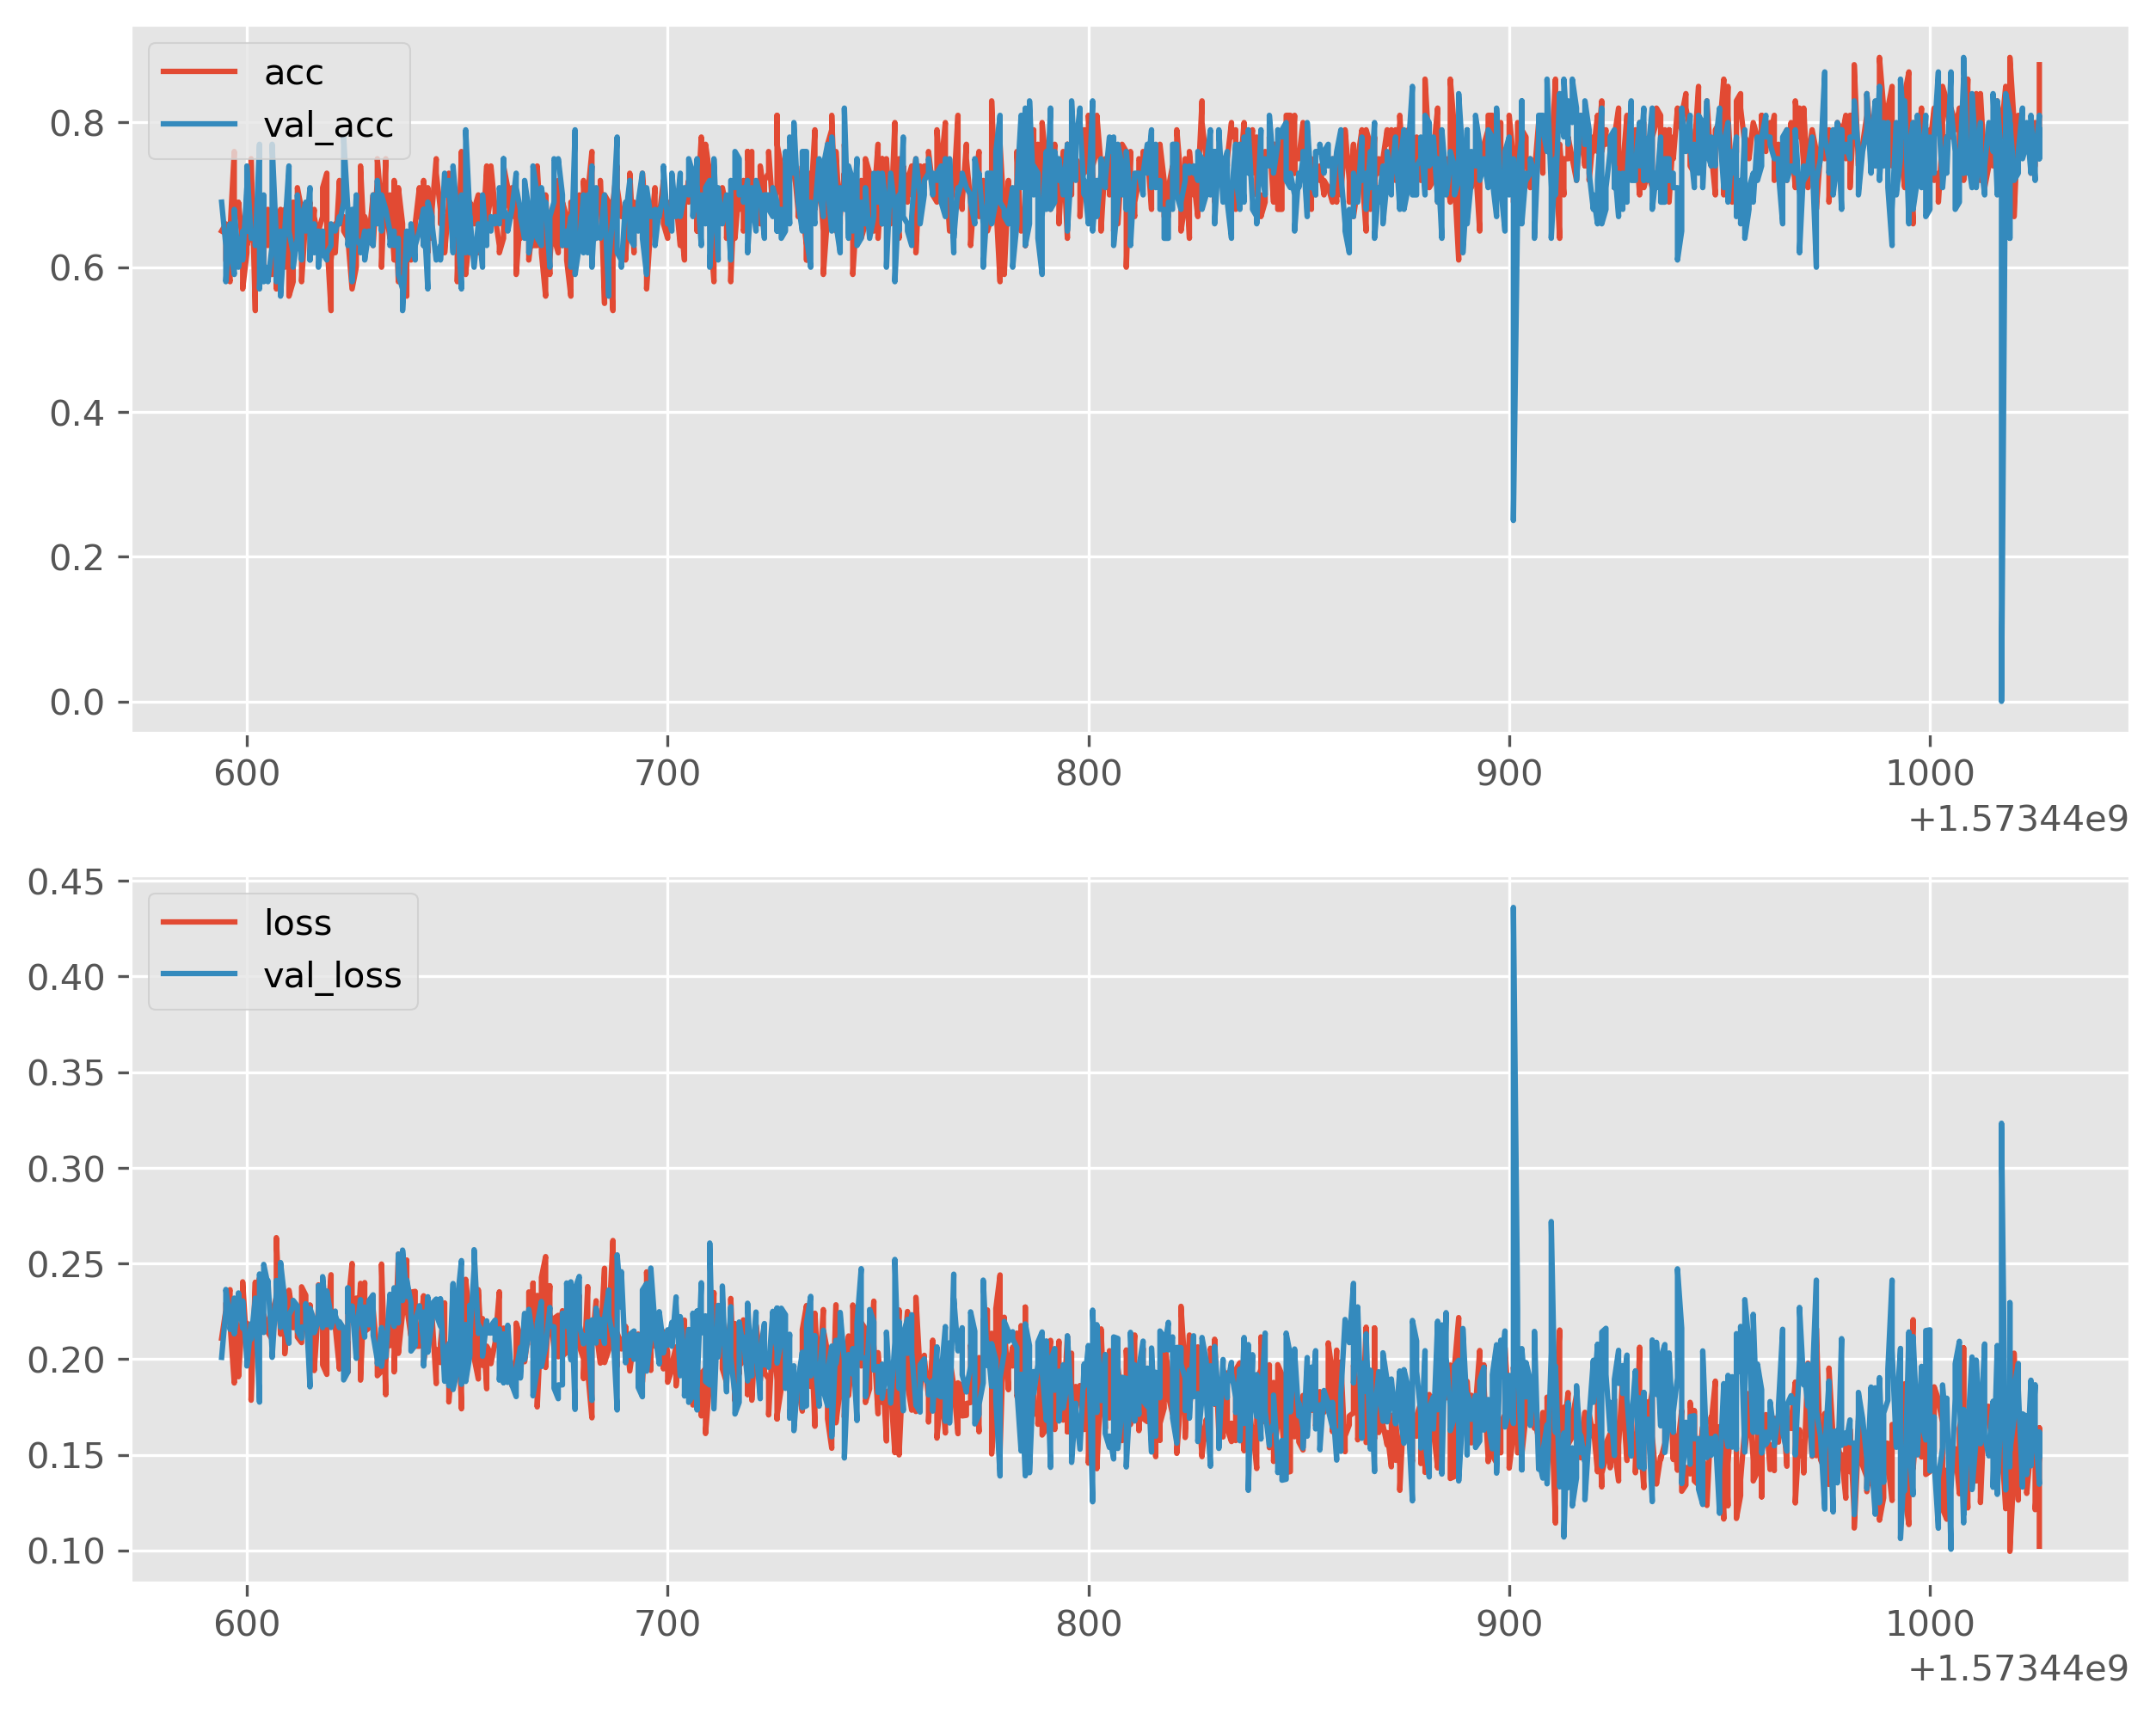

In [120]:
# plot
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

model_name = "MODEL_NAME1" 
# grab whichever model name you want here.


def create_acc_loss_graph(model_name):
    # read the file and split by new line
    times = []
    accuracies = []
    losses = []
    val_accs = []
    val_losses = []
    # iterate over our contents 
    with open("model.log", "r") as rf:
        contents = rf.read().split("\n")
        for c in contents:
            try:
                c = c.split(',')
                del c[2]
                del c[4]
                name, timestamp, acc, loss, val_acc, val_loss = c

                times.append(float(timestamp))
                accuracies.append(float(acc))
                losses.append(float(loss))

                val_accs.append(float(val_acc))
                val_losses.append(float(val_loss))
            except IndexError:
                    pass

    # plot muti figure
    fig = plt.figure()
    # each ex1 is a figure, 2 by 1 grid, the first one start at (0,0) mark
    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times,losses, label="loss")
    ax2.plot(times,val_losses, label="val_loss")
    ax2.legend(loc=2)
    plt.show()
    
create_acc_loss_graph(model_name)